# Feature Selection (scikit-learn)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA

## Removing features with low variance

In [2]:
X = [[0, 2, 0, 3], 
     [0, 1, 4, 3], 
     [0, 1, 1, 3]] 

It removes all features whose variance doesn’t meet some threshold
By default, it removes all zero-variance features.

In [3]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()

In [4]:
selected = selector.fit_transform(X)

In [5]:
selected

array([[2, 0],
       [1, 4],
       [1, 1]])

We have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples.

Boolean features are Bernoulli random variables, and the variance of such variables is given by var = p(1-p)

In [6]:
X = [[0, 0, 1], 
     [0, 1, 0], 
     [1, 0, 0], 
     [0, 1, 1], 
     [0, 1, 0], 
     [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

## Univariate feature selction

Univariate feature selection works by selecting the best features based on univariate statistical tests.

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [8]:
iris = load_iris()

In [9]:
X, y = iris.data, iris.target

In [10]:
X.shape

(150, 4)

SelectKBest

In [11]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

In [12]:
X_new.shape

(150, 2)

In [13]:
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

SelectPercentile

In [14]:
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 7)

## Recursive feature elimination

Recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of feature

In [15]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

In [16]:
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

n_features_to_select: The number of features to select. If None, half of the features are selected.

step: The number of features to remove at each iteration

In [17]:
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)

RFE(estimator=SVC(C=1, kernel='linear'), n_features_to_select=1)

In [18]:
rfe.ranking_

array([64, 50, 31, 23, 10, 17, 34, 51, 57, 37, 30, 43, 14, 32, 44, 52, 54,
       41, 19, 15, 28,  8, 39, 53, 55, 45,  9, 18, 20, 38,  1, 59, 63, 42,
       25, 35, 29, 16,  2, 62, 61, 40,  5, 11, 13,  6,  4, 58, 56, 47, 26,
       36, 24,  3, 22, 48, 60, 49,  7, 27, 33, 21, 12, 46])

In [19]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [20]:
ranking = rfe.ranking_.reshape(digits.images[0].shape)

Plot pixel ranking

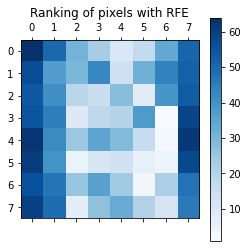

In [21]:
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

## Feature slection using SelectFromModel

Linear models 

In [22]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [23]:
X, y = load_iris(return_X_y=True)
lsvc = LinearSVC(C=0.01, penalty='l1', dual=False).fit(X, y)

In [24]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [25]:
lsvc.coef_

array([[ 0.        ,  0.21703131, -0.28757489,  0.        ],
       [ 0.        , -0.09200224,  0.        ,  0.        ],
       [-0.02559946, -0.18160168,  0.12960914,  0.        ]])

In [26]:
model = SelectFromModel(lsvc, prefit=True)

In [27]:
X_new = model.transform(X)

In [28]:
X_new.shape

(150, 3)

In [29]:
X_new[:5]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

Tree-based models

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
clf = ExtraTreesClassifier(n_estimators=50)

In [32]:
clf = clf.fit(X, y)

In [33]:
clf.feature_importances_

array([0.11327003, 0.06815285, 0.42599435, 0.39258277])

In [34]:
model = SelectFromModel(clf, prefit=True)

In [35]:
X_new = model.transform(X)

In [36]:
X_new.shape

(150, 2)

In [37]:
X_new[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

# Feature Extraction

## Principle Component Analysis (PCA)

In [38]:
iris =load_iris()

In [39]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [40]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

In [41]:
X_r.shape

(150, 2)

Percentage of variance explained for each components

In [42]:
print('Explained variance ratio (first two components): {}'.format(pca.explained_variance_ratio_))

Explained variance ratio (first two components): [0.92461872 0.05306648]


Text(0.5, 1.0, 'PCA of IRIS dataset')

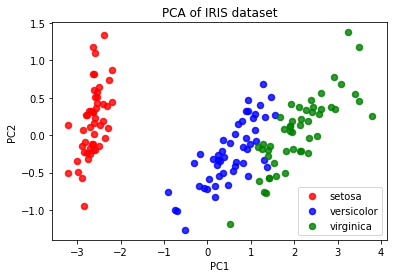

In [43]:
colors = ['red', 'blue', 'green']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, 
                alpha=0.8, lw=1.5, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('PCA of IRIS dataset')

In [44]:
 digits = load_digits()

In [45]:
digits.data.shape

(1797, 64)

In [46]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)

In [47]:
projected.shape

(1797, 2)

In [48]:
print('Explained variance ratio (first two components): {}'.format(pca.explained_variance_ratio_))

Explained variance ratio (first two components): [0.14890594 0.13618771]


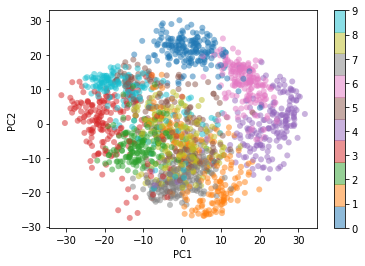

In [49]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, alpha=0.5, edgecolor='none', 
            cmap=plt.cm.get_cmap('tab10'))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()

Choosing the number of components

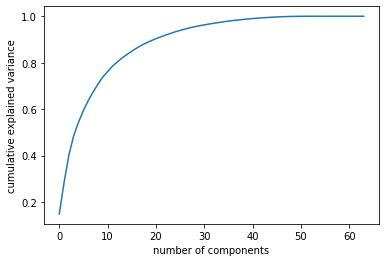

In [50]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Select an elbow

In [51]:
pca = PCA(n_components=20).fit(digits.data)

In [52]:
sum(pca.explained_variance_ratio_)

0.8942997295002296

Provide the percentage

In [53]:
pca = PCA(n_components=0.95).fit(digits.data)

In [54]:
pca.n_components_

29

## Locally Linear Embedding (LLE)

In [55]:
from mpl_toolkits import mplot3d
from sklearn import manifold

In [56]:
X, t = make_swiss_roll(n_samples=1500)

In [57]:
X[:5]

array([[  8.70374059,   1.43125042,  10.23084226],
       [  2.04417896,  15.69206643, -10.99098094],
       [ -8.53670266,   9.93265581,  -5.14479556],
       [ 12.60458804,  19.35500673,   1.1809488 ],
       [ 12.45217785,  11.27094402,   2.96382904]])

Text(0.5, 0.92, 'Original data')

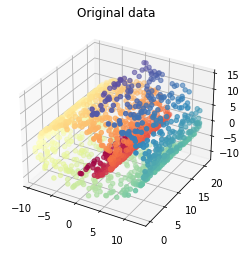

In [58]:
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.Spectral)
ax.set_title("Original data")

In [59]:
lle = manifold.LocallyLinearEmbedding(n_neighbors=12, n_components=2)

In [60]:
Y = lle.fit_transform(X)

Text(0.5, 1.0, 'LLE')

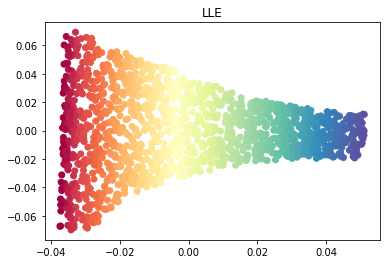

In [61]:
plt.scatter(Y[:, 0], Y[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title('LLE')

## FeatureAgglomeration

cluster.FeatureAgglomeration applies Hierarchical clustering to group together features that behave similarly.

In [62]:
from sklearn import cluster

In [64]:
digits = load_digits()
images = digits.images

In [65]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [66]:
X = np.reshape(images, (len(images), -1))

In [67]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [68]:
len(X[0])

64

In [69]:
agglo = cluster.FeatureAgglomeration(n_clusters=32)
agglo.fit(X)

FeatureAgglomeration(n_clusters=32)

In [70]:
X_reduced = agglo.transform(X)
X_reduced.shape

(1797, 32)